# <center>Sentiment Analysis in Python</center>


# Table of contents
    - What is this about?
    - Imports and setting up environment
    - Reading Data
    - A quick EDA
    - Data Prepration
    - VADER Model
        - Introduction
        - Downloading and Model initialization
        - Testing
    - RoBERTa Model
        - Introduction
        - Downloading and initializing Model
        - Running on text Data
    - Comparision between VADER and RoBERTa

# What is this about?
    Sentiment analysis tools are much more needed now a days. For knowing about the sentiment of a tweets, posts, product reviews, news, blog articles and any other data posted online. 
    Its very hard for machine to understand the human experience, tone, attitude, emotion. But combination of linguistic + computer science techniques can help.
    In this analysis I explored two of the common techniques to determine the sentiment of a text which are: 
     - VADER Model - NLTK (A Bag Of Word Approch)
     - ROBERTA Model - Hugging face extension of BERT Model (Transformer based Model)

#### Imports and setting up environments.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

plt.style.use('ggplot')

import nltk

#### Reading a amazon fine food reviews data-set. I subseted the first 100 reviews.

In [102]:
df = pd.read_csv('archive/Reviews.csv')[:100]

#### A very quick EDA on data-set!!

In [103]:
df.head(3)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [104]:
df.Text[2]

'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.'

In [105]:
df = df[['Id', 'ProfileName', 'Summary', 'Score', 'Text']]

In [106]:
df.head(3)

,Id,ProfileName,Summary,Score,Text
0,1,delmartian,Good Quality Dog Food,5,I have bought several of the Vitality canned d...
1,2,dll pa,Not as Advertised,1,Product arrived labeled as Jumbo Salted Peanut...
2,3,"Natalia Corres ""Natalia Corres""","""Delight"" says it all",4,This is a confection that has been around a fe...


In [107]:
df.Text[82] = df.Summary[82]

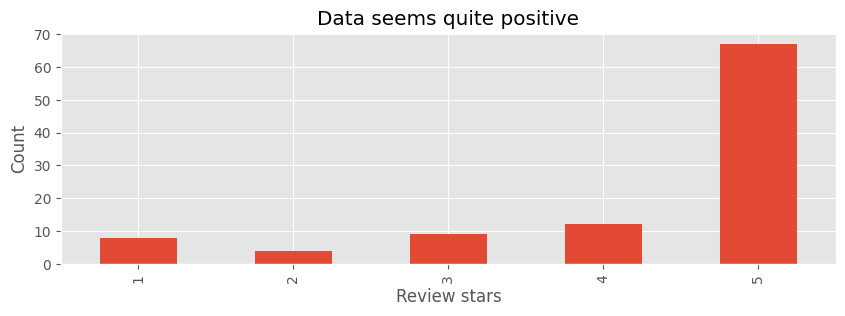

In [108]:
df.Score.value_counts().sort_index() \
    .plot(
        kind = 'bar',
        title = 'Data seems quite positive',
        figsize = (10, 3),
        xlabel = 'Review stars',
        ylabel = 'Count'
        )
plt.show()

## The VADER (Valence Aware Dictionary for sEntiment Reasoning) Model
    This is a lexicon and rule based approch having grammatical rules and syntatical convention insted of machine learning approch. The model constructed a huge dictionary of sentiment features. It not only contain words, but also phrases (such as “bad ass” and “the bomb”), emoticons (such as “:-)”) and sentiment-laden acronyms (such as “ROFL” and “WTF”).
    The model returns a polarity and intensity scores from 0 to 1 or a compound score form -1 to 1 to the text, word feeded to the model.

### Downloads and Model Initialization

#### I will be using SentimentIntensityAnalyzer from nltk. It is based on VADER Model..!

In [109]:
# nltk.download('vader_lexicon')

In [110]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [111]:
sia.polarity_scores('How did no one find it good.')

{'neg': 0.218, 'neu': 0.495, 'pos': 0.287, 'compound': 0.1779}

#### VADER Model Scores as 'vs' 

In [112]:
vs = pd.Series(map(lambda x: sia.polarity_scores(x), df.Text))

In [113]:
df['v_neg'] = pd.Series(map(lambda x: x['neg'], vs))
df['v_pos'] = pd.Series(map(lambda x: x['pos'], vs))
df['v_neu'] = pd.Series(map(lambda x: x['neu'], vs))
df['v_compound'] = pd.Series(map(lambda x: x['compound'], vs))

## Its looks like VADER Model results are pretty positive too...!

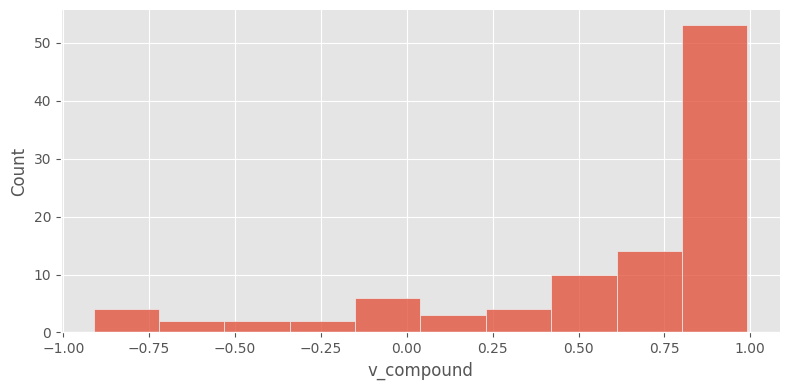

In [114]:
sns.displot(df.v_compound, aspect = 2, height = 4)
plt.show()

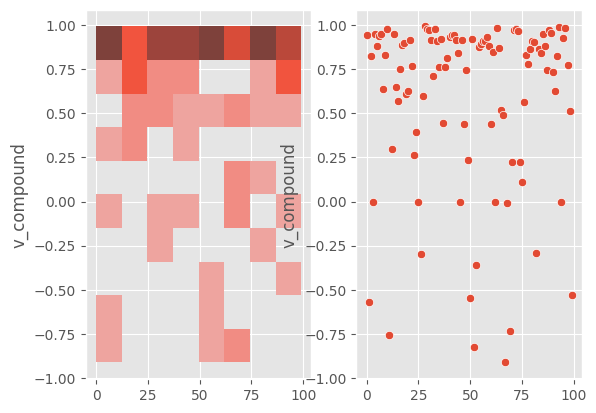

In [115]:
fig, ax = plt.subplots(1, 2)
sns.histplot(x = df.v_compound.index, y = df.v_compound , ax = ax[0])
sns.scatterplot(x = df.v_compound.index, y = df.v_compound , ax = ax[1])
plt.show()

<AxesSubplot: xlabel='Score', ylabel='v_compound'>

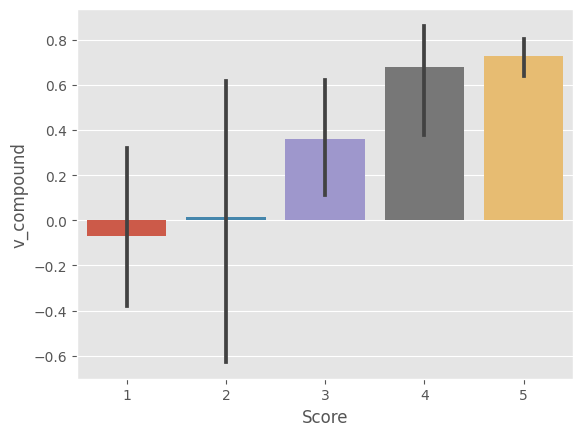

In [116]:
sns.barplot(x='Score', y='v_compound', data=df)

#### Results of VADER Model is more accurate for higher scores.

# RoBERTa (Robustly optimizeed BERT pre-Train Approch)
    This is a transformer based model and a extension of BERT a Google's NLP(Natural Language Processing) Model.
    This transformer based model can also somewhat handle the context between words in the sentences.
     

In [117]:
HTML('''<img src='http://mccormickml.com/assets/BERT/BERT_Mountain.png'>''')

    The Model evovles from recurrent neural networks. It uses a LSTM(Long Short Term Memory) layer with RNN(Recurrent Neural Network)
    Although this approch was very tideous and tooks a lot time and computational power. Which eventully improved by Encoder-Decoder, Transfomers, and BERT Model.
    The RoBERTa Model is Extension of BERT Model. The hugging face train, tune-up and customise the model for sentiment analysis. 
    First i tokenize the text into phrases and words. Then encode the text, Text encoding is a way of representing the text data into numeric vector format.
    Neurals networks process the vectorised text sequentially. 

In [118]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

I downloaded nearly 500 MB of pre-trained Model

In [119]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [120]:
def RoBERTa_Model(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = softmax(output[0][0].detach().numpy())

    return scores

#### RoBERTa Scores as rs 

In [121]:
rs = pd.Series(map(lambda x: RoBERTa_Model(x), df.Text))

In [122]:
df['r_neg'] = pd.Series(map(lambda x: x[0], rs))
df['r_neu'] = pd.Series(map(lambda x: x[1], rs))
df['r_pos'] = pd.Series(map(lambda x: x[2], rs))

### Conparition between VADER and RoBERTa

In [ ]:
sns.pairplot(data = df,
            vars = ['v_neg', 'v_neu', 'v_pos', 'r_neg', 'r_neu', 'r_pos'],
            hue = 'Score',
            palette='tab10')
plt.show()